# THE FUNCTIONALS CAPSTONE PROJECT DS/C3

## HEART DISEASE RISK PREDICTION MODEL

In [1]:
#importing all required dictionaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

sns.set() #default style for seaborn

import warnings
warnings.filterwarnings("ignore")

### LOADING CSV AND PRELIMINARY CHECKS

In [2]:
#  STEP 1: Load CSV

data = pd.read_csv(r"C:\Users\Toluwanimi\Downloads\heart.csv")

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Understanding the data set and Data Cleaning Process

In [3]:
data.shape #number of rows and columns

(1025, 14)

In [4]:
data.isna().sum() #checking for null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data.duplicated().sum() #checking for duplicate values

np.int64(723)

In [6]:
# Dropping duplicate values & saving cleaned dataset into a variable for further analysis
Heart_Data = data.drop_duplicates(keep='first') 

#### Visualising new (cleaned) dataset and carrying out preliminary checks

In [7]:
#new cleaned dataset
Heart_Data 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [8]:
Heart_Data.head(20) 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


### Summary Statistics

In [9]:
Heart_Data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Total Number of Patients = 302
### Average age = 54.4
### Minimum age = 29 years
### Maximum age = 77 years
### Gender distribution:  1 = Male (68.212%)
###                       0 = Female (31.788%)
### Chest Pain Type (cp):
>Typical angina - 
>Atypical angina - 
>Non-anginal pain - 
>Asymptomatic
### Minimum cholesterol level = 126
### Maximum cholesterol level = 564
### Mean cholesterol level = 246.50
### Target (Presence of Heart Disease) 0 = No, 1 = Yes
### Presence of heart disease = 54.305%
### Absence of heart disease = 45.695%

## Preliminary visualizations

### Age Distribution

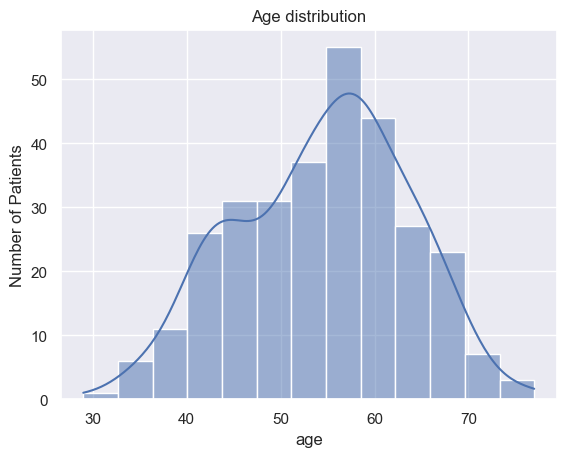

In [10]:
#age distribution using histplot to visualize and also detect outliers
sns.histplot(data=Heart_Data, x='age', kde=True)
plt.title('Age distribution')
plt.ylabel("Number of Patients")
plt.show()

### Gender Distribution

In [11]:
#obtaining gender data from dataset
Gender_count = Heart_Data["sex"].value_counts()

In [12]:
Gender_count # 1 = Male, 0 = Female

sex
1    206
0     96
Name: count, dtype: int64

In [13]:
Gender_count.values

array([206,  96])

In [14]:
Gender_count.index

Index([1, 0], dtype='int64', name='sex')

#### 1 = Male
#### 0 = Female

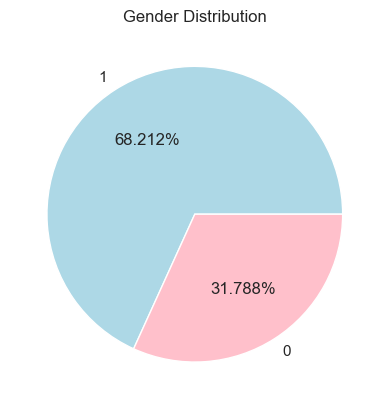

In [15]:
plt.pie(Gender_count, labels=Gender_count.index, autopct='%1.3f%%', colors=["Lightblue", "Pink"])
plt.title("Gender Distribution")
plt.show()

### Heart Disease Distribution

In [16]:
# Getting heart data
Target_count = Heart_Data["target"].value_counts()

In [17]:
Target_count

target
1    164
0    138
Name: count, dtype: int64

In [18]:
Target_count.values

array([164, 138])

In [19]:
Target_count.index

Index([1, 0], dtype='int64', name='target')

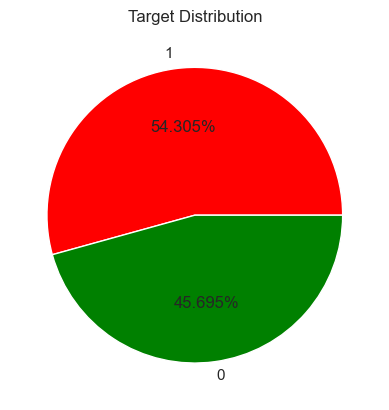

In [20]:
# Visualizing Heart disease presence distribution
plt.pie(Target_count, labels=Target_count.index, autopct='%1.3f%%', colors=["Red", "Green"])
plt.title("Target Distribution")
plt.show()

### Visualising for outliers in all variables using histplot

### Age
#### No visible Outliers

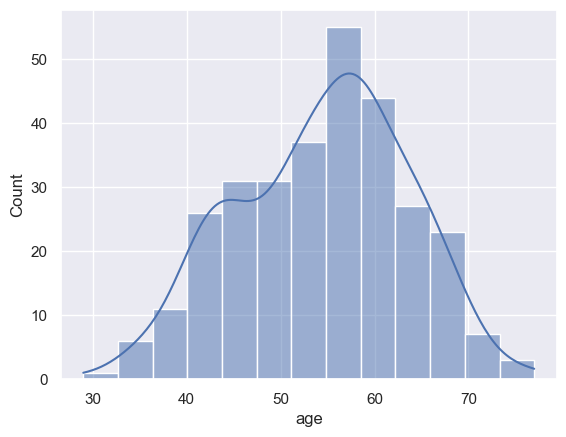

In [21]:
sns.histplot(Heart_Data["age"], kde=True)

plt.show()

#### Gender (1 = Male, 0 = Female)
#### No visible outliers

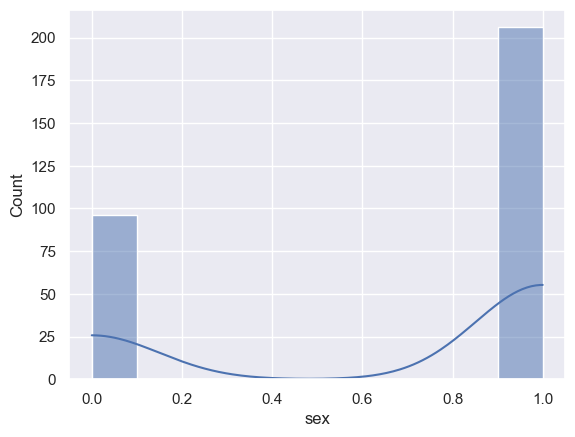

In [22]:
sns.histplot(Heart_Data["sex"], kde=True)

plt.show()

### Chest Pain Type
### No visible Outliers

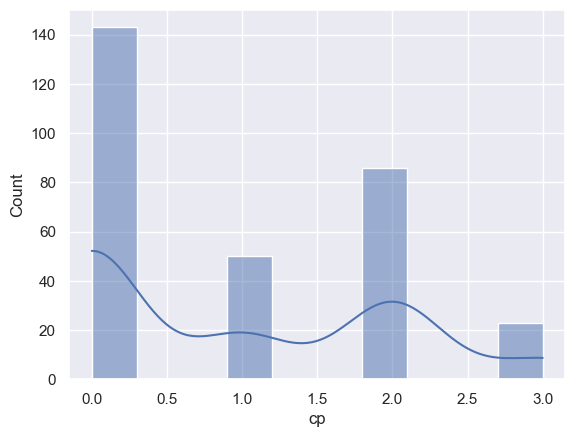

In [23]:
sns.histplot(Heart_Data["cp"], kde=True)
plt.show()

### Resting Blood Pressure ((in mm Hg on admission to the hospital)
### Minor Outliers Present

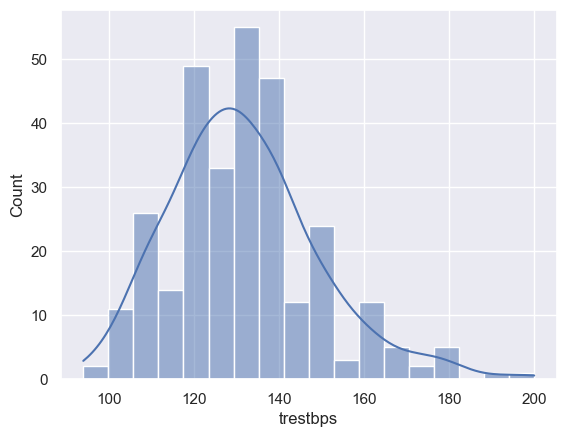

In [24]:
sns.histplot(Heart_Data["trestbps"], kde=True)
plt.show()

### Cholesterol Level (serum cholestoral in mg/dl)
### Visible Outliers

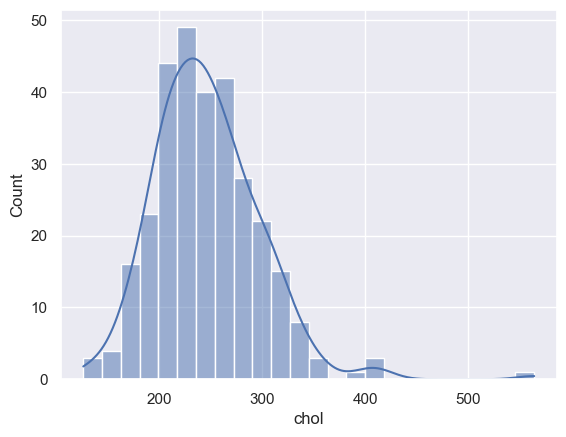

In [25]:
sns.histplot(Heart_Data["chol"], kde=True)
plt.show()

### Fasting Blood Sugar (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
### No visible Outliers

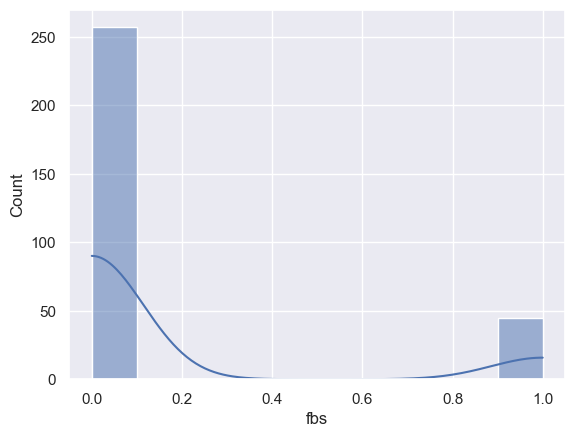

In [26]:
sns.histplot(Heart_Data["fbs"], kde=True)
plt.show()

### Resting electrocardiographic results
### Outliers visible

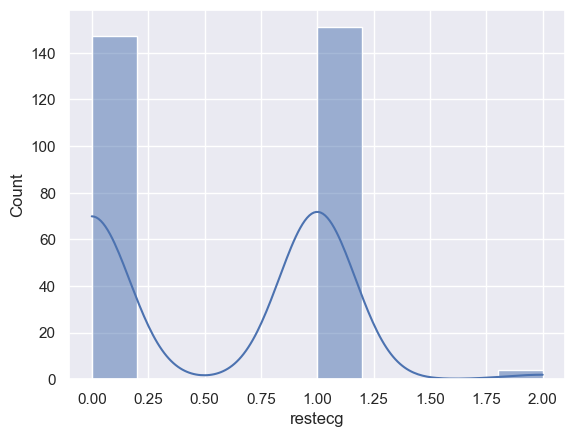

In [27]:
sns.histplot(Heart_Data["restecg"], kde=True)
plt.show()

### Thalach (Maximum heart rate achieved)
### No visible Outliers

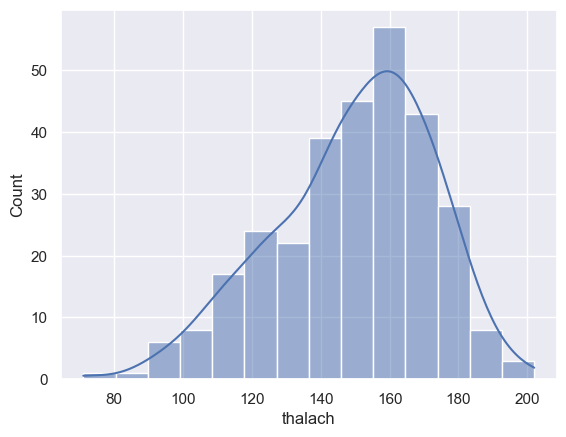

In [28]:
sns.histplot(Heart_Data["thalach"], kde=True)
plt.show()

### Exang (Exercise induced angima)
### No visible Outliers

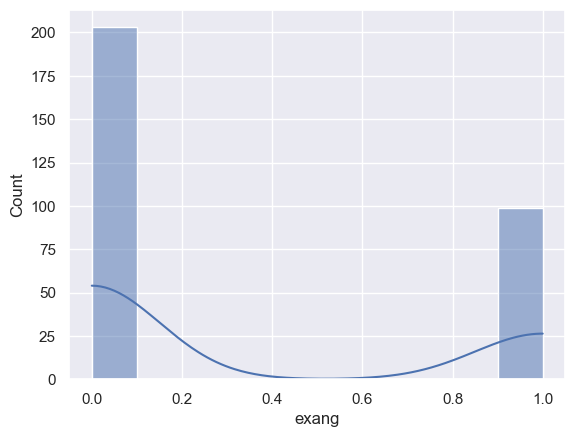

In [29]:
sns.histplot(Heart_Data["exang"], kde=True)
plt.show()

### Old peak (ST depression induced by exercise relative to rest)
### Visible Outliers Present

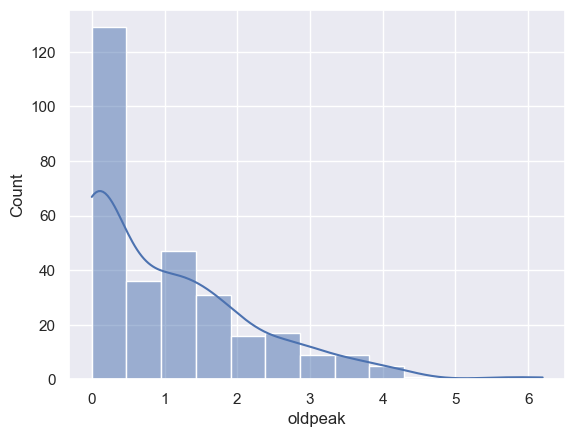

In [30]:
sns.histplot(Heart_Data["oldpeak"], kde=True)
plt.show()

### Slope (the slope of the peak exercise ST segment)
### Minor Outliers visible

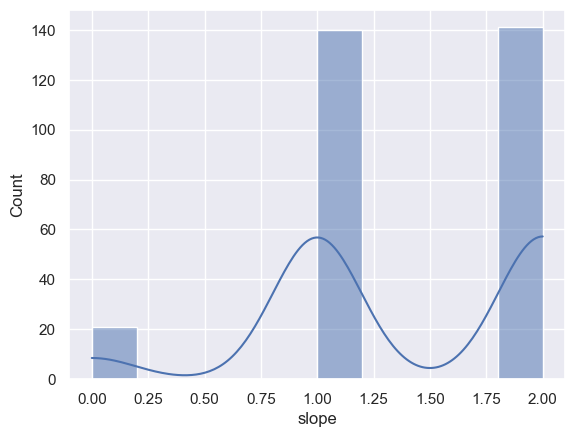

In [31]:
sns.histplot(Heart_Data["slope"], kde=True)
plt.show()

### Number of major vessels (0-3) colored by flourosopy
### Minor outliers visible

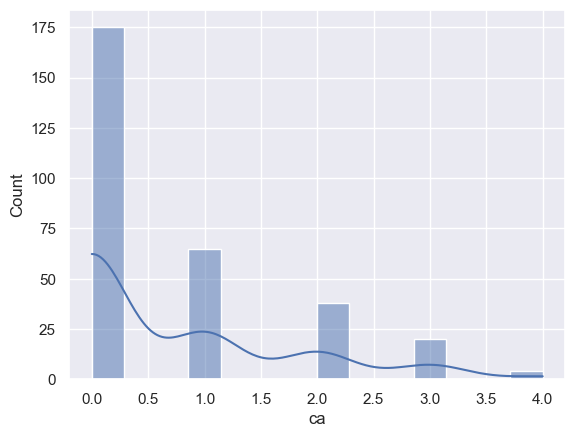

In [32]:
sns.histplot(Heart_Data["ca"], kde=True)
plt.show()

### Thal (1 = normal; 2 = fixed defect; 3 = reversable defect)
### Minor outliers visible

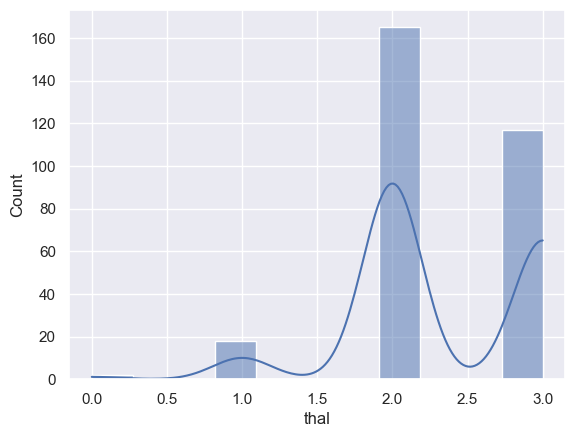

In [33]:
sns.histplot(Heart_Data["thal"], kde=True)
plt.show()

### Target (Presence of Heart Disease, 1 = Present, 0 = Absent)
### No visible outliers

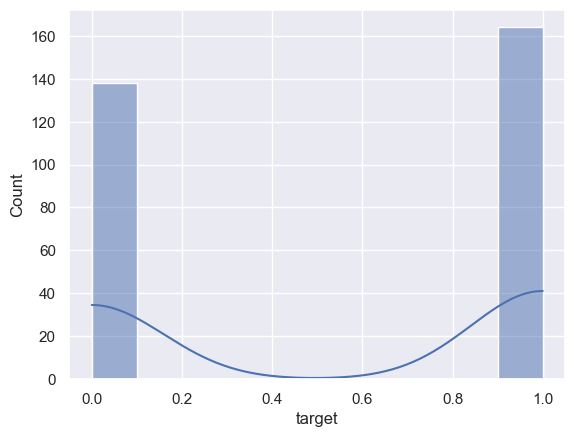

In [34]:
sns.histplot(Heart_Data["target"], kde=True)
plt.show()

## COMPUTING DESCRIPTIVE STATISTICS
This gives a quick summary of key descriptive statiatics analyses

In [35]:
Heart_Data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [36]:
#random sampling

Heart_Data.sample(n=10, random_state=5) 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
74,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
203,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
498,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
286,64,0,2,140,313,0,1,133,0,0.2,2,0,3,1
25,61,0,0,145,307,0,0,146,1,1.0,1,0,3,0
599,63,0,1,140,195,0,1,179,0,0.0,2,2,2,1
323,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
101,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
53,49,1,2,120,188,0,1,139,0,2.0,1,3,3,0
348,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [37]:
#systematic sampling

systematic_sample = Heart_Data.iloc[::40] #to select every 40th element

systematic_sample

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
42,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0
91,62,0,0,124,209,0,1,163,0,0.0,2,0,2,1
146,51,0,2,120,295,0,0,157,0,0.6,2,0,2,1
205,42,1,3,148,244,0,0,178,0,0.8,2,2,2,1
287,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
374,46,0,2,142,177,0,0,160,1,1.4,0,0,2,1
580,46,1,1,101,197,1,1,156,0,0.0,2,0,3,1


In [38]:
#stratified sampling

stratified_sample = Heart_Data.groupby('sex', group_keys=False).apply(lambda x: x.sample(5, random_state = 1))

stratified_sample

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
173,39,0,2,94,199,0,1,179,0,0.0,2,0,2,1
125,60,0,3,150,240,0,1,171,0,0.9,2,0,2,1
233,41,0,1,126,306,0,1,163,0,0.0,2,0,2,1
288,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
434,41,0,2,112,268,0,0,172,1,0.0,2,0,2,1
139,41,1,1,110,235,0,1,153,0,0.0,2,0,2,1
170,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
332,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
72,56,1,0,125,249,1,0,144,1,1.2,1,1,2,0
66,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1


In [39]:
Heart_Data['age'].mean()

np.float64(54.420529801324506)

In [40]:
Heart_Data['age'].median()

55.5

In [41]:
Heart_Data['age'].mode()[0]

np.int64(58)

In [42]:
Heart_Data['age'].var()

81.86575652900935

In [43]:
Heart_Data['age'].std()

9.04796974624746

In [44]:
range_age = (Heart_Data["age"].max()) - (Heart_Data["age"].min())

range_age

48

In [45]:
Heart_Data['age'].min(),Heart_Data['age'].max()

(29, 77)

In [46]:
Heart_Data["age"].describe()

count    302.00000
mean      54.42053
std        9.04797
min       29.00000
25%       48.00000
50%       55.50000
75%       61.00000
max       77.00000
Name: age, dtype: float64

## SHAPE OF DISTRIBUTION

In [47]:

#Skweness and kurtosis(using scipy or pandas)
Heart_Data['age'].skew()
Heart_Data['age'].kurt()

np.float64(-0.5275122997069857)

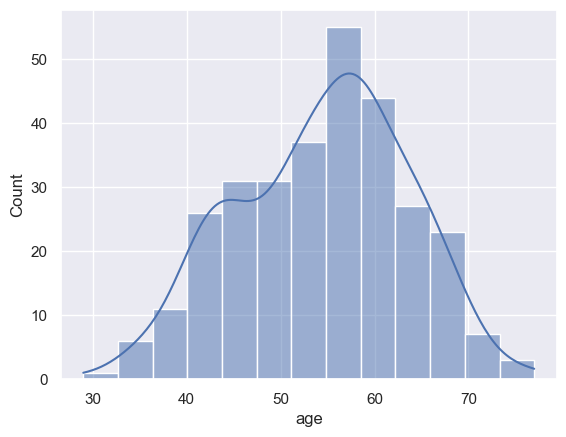

In [48]:
sns.histplot(Heart_Data["age"], kde=True)

plt.show()

In [49]:
Heart_Data_skewness = skew(Heart_Data["age"])

Heart_Data_skewness

np.float64(-0.2027299102135712)

In [50]:
Heart_Data_kurtosis = kurtosis(Heart_Data["age"], fisher=False)

Heart_Data_kurtosis

np.float64(2.4613789756508386)

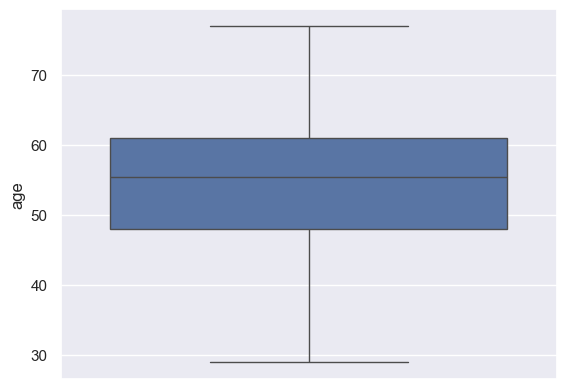

In [51]:
sns.boxplot(y = Heart_Data["age"])

plt.show()

In [52]:
Q1 = Heart_Data["age"].quantile(0.25)

Q1

np.float64(48.0)

In [53]:
Q3 = Heart_Data["age"].quantile(0.75)

Q3

np.float64(61.0)

In [54]:
IQR = Q3 - Q1

IQR

np.float64(13.0)

In [55]:
lower_whisker = Q1 - 1.5*IQR
upper_whisker = Q3 + 1.5*IQR

In [56]:
lower_whisker

np.float64(28.5)

In [57]:
upper_whisker

np.float64(80.5)

In [58]:
Heart_Data[(Heart_Data["age"] < lower_whisker) | (Heart_Data["age"] > upper_whisker)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


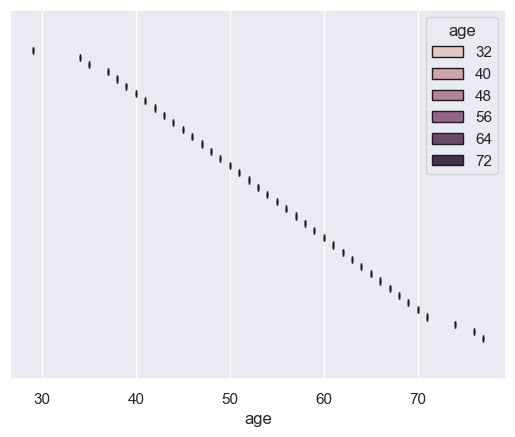

In [59]:
sns.boxplot(data=Heart_Data, x="age", hue="age")

plt.show()

# EXPLORATORY DATA ANALYSIS
> Univariate Analysis: Examining one variable at a time

### Checking the relationship/correlation between age and presence of heart disease

In [60]:
#grouping the related variables under observation
Age_disease = Heart_Data.groupby("age")["target"].count().reset_index()

Age_disease

,age,target
0,29,1
1,34,2
2,35,4
3,37,2
4,38,2
5,39,4
6,40,3
7,41,10
8,42,8
9,43,8


### Histplot showing correlation between age and heart disease 

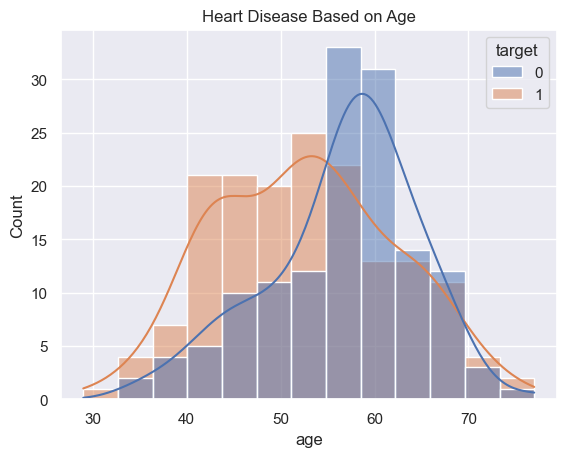

In [61]:
#visualization of the relationship
sns.histplot(data=Heart_Data, x='age', hue='target', kde=True)
plt.title('Heart Disease Based on Age')
plt.show()

### Correlation between gender and heart disease rate

In [62]:
#Grouping variables under observation
Gender_disease = Heart_Data.groupby("sex")["target"].count().reset_index()

Gender_disease

,sex,target
0,0,96
1,1,206


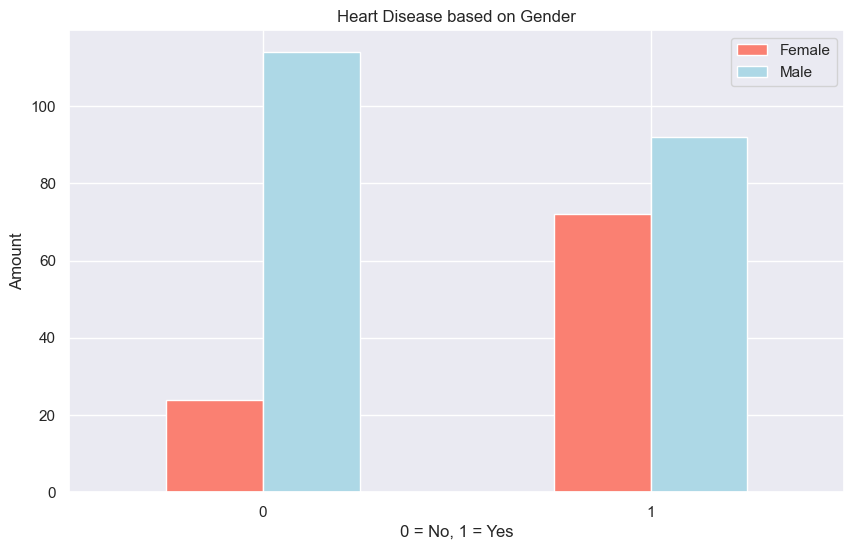

In [63]:
#Visualizing correlation between Heart disease and Gender
pd.crosstab(Heart_Data.target, Heart_Data.sex).plot(kind = "bar", color=["salmon", "lightblue"], figsize=(10,6))
plt.title("Heart Disease based on Gender")
plt.xlabel("0 = No, 1 = Yes")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation= 0);

### Chest Pain Type (cp) Distribution:

1: Typical angina
2: Atypical angina
3: Non-anginal pain
4: Asymptomatic

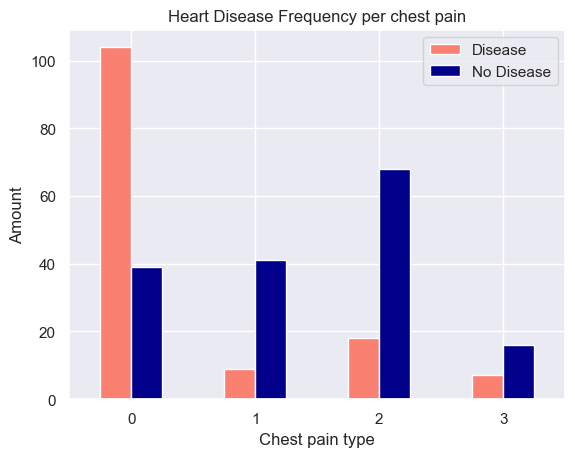

In [64]:
#Correlation visualization between chest pain type and presence of heart disease
pd.crosstab(Heart_Data.cp, Heart_Data.target).plot(kind='bar', color=['salmon', 'darkblue'])

plt.title("Heart Disease Frequency per chest pain")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["Disease", "No Disease"])
plt.xticks(rotation= 0);

### Heart disease correlation visualization


--- Target Variable Distribution ---
target
1    164
0    138
Name: count, dtype: int64


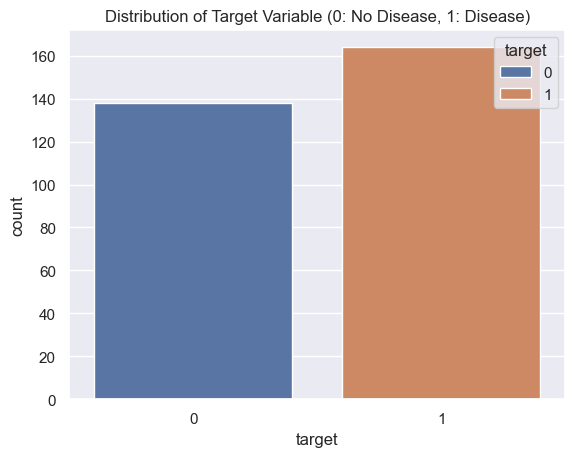

In [65]:
# Defining variables in the correlation
print("\n--- Target Variable Distribution ---")
target_counts = Heart_Data['target'].value_counts()
print(target_counts)
sns.countplot(x='target', data=Heart_Data, hue='target')
plt.title('Distribution of Target Variable (0: No Disease, 1: Disease)')
plt.show()

### Cholesterol Levels distribution

In [66]:
Heart_Data["chol"].value_counts() #extracting the values in the correlation

chol
204    6
197    6
234    6
212    5
269    5
      ..
262    1
195    1
166    1
178    1
141    1
Name: count, Length: 152, dtype: int64

In [67]:
chol_count = Heart_Data["chol"].value_counts() #saving the extracted values into a variable

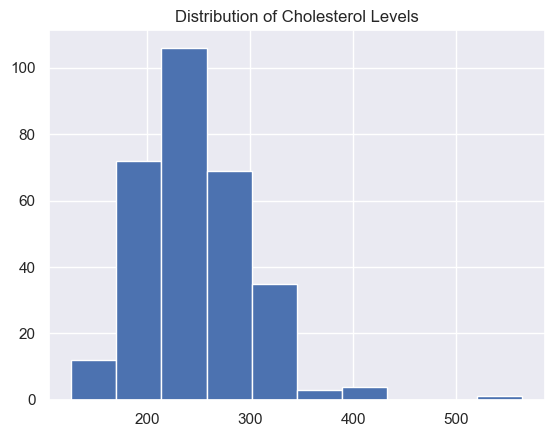

In [68]:
#Histogram
#shows the distribution of a numerical variable

plt.hist(Heart_Data["chol"], bins=10)
plt.title("Distribution of Cholesterol Levels")
plt.show()

### Correlation matrix of dataset

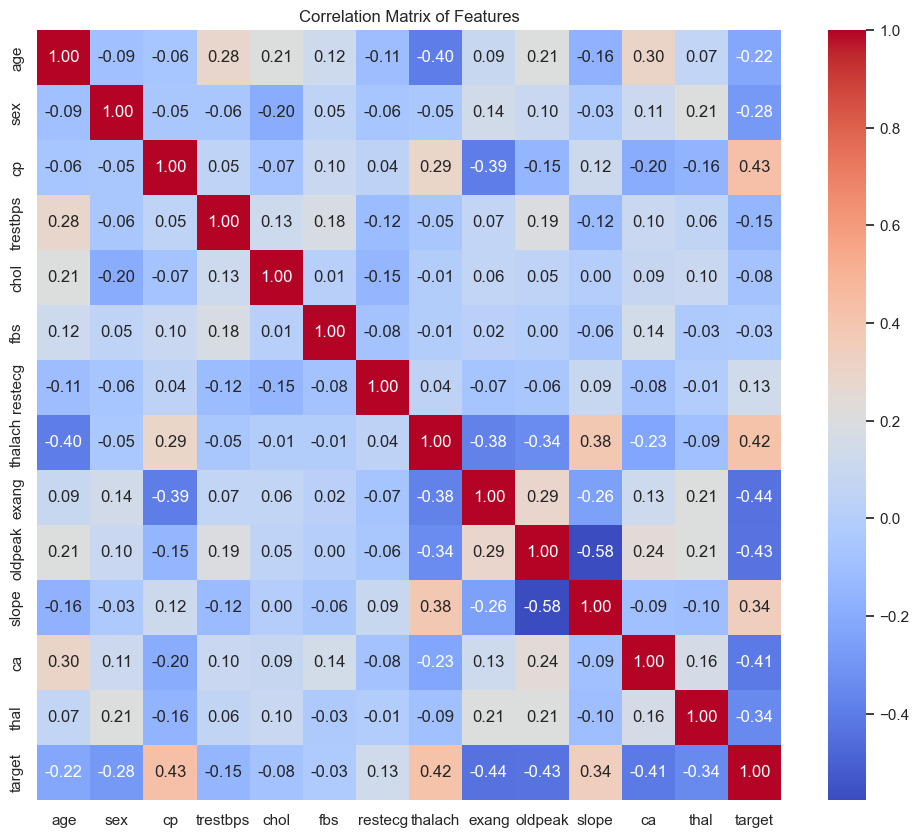

In [69]:
# plotting a heatmap to show the correlation between all variables in the dataset
plt.figure(figsize=(12, 10))
sns.heatmap(Heart_Data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

## Bivariate Analysis
Examining mutliple variables at a time

In [70]:
#age & cholesterol level by heart disease presence

HeartDisease_by_Age_Cholesterol = Heart_Data.groupby(['target', 'age', 'chol']).size().unstack(fill_value=0).reset_index()

HeartDisease_by_Age_Cholesterol

chol,target,age,126,131,141,149,157,160,164,166,...,341,342,353,354,360,394,407,409,417,564
0,0,35,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,38,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,39,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,40,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,41,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1,69,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,1,70,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,1,71,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,1,74,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
#saving the variables under observation into a variable
correlation_matrix = Heart_Data[["age", "chol", "target"]].corr()

correlation_matrix

,age,chol,target
age,1.000000,0.207216,-0.221476
chol,0.207216,1.000000,-0.081437
target,-0.221476,-0.081437,1.000000


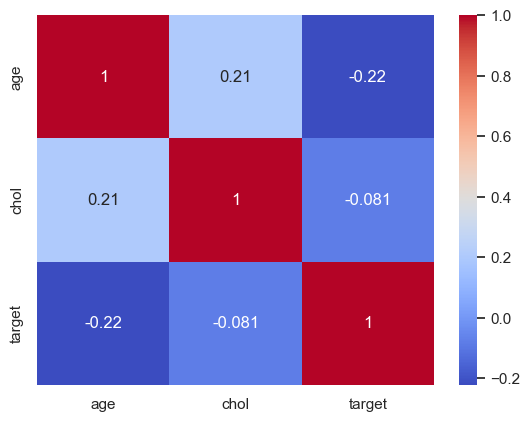

In [72]:
#plottig the correlation matrix heatmap for visualization
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.show()

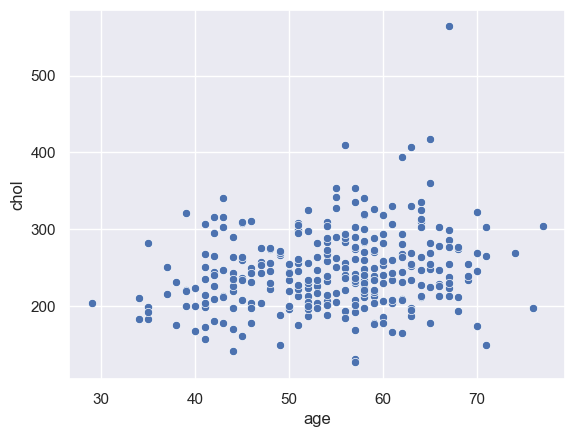

In [73]:
#Visualization of correlation between age and cholesterol level
sns.scatterplot(x=Heart_Data["age"], y=Heart_Data["chol"])

plt.show()

# Scatter plots for key features against target variable

In [74]:
Heart_Data['target_label'] = Heart_Data['target'].map({0: 'No heart disease', 1: 'Heart disease'})

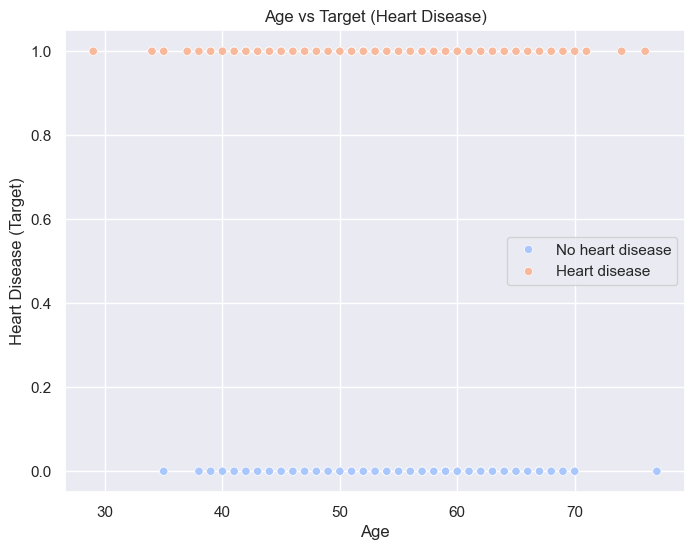

In [75]:
# Age vs Target
plt.figure(figsize=(8, 6))
sns.scatterplot(data=Heart_Data, x='age', y='target', hue='target_label', palette='coolwarm')
plt.title('Age vs Target (Heart Disease)')
plt.xlabel('Age')
plt.ylabel('Heart Disease (Target)')
plt.legend(title='')
plt.show()

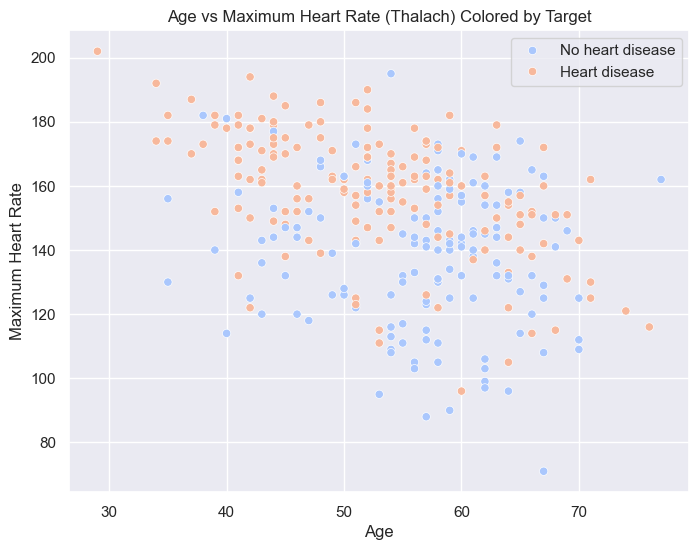

In [76]:
#Age and Maximum Heart Rate (thalach), colored by target
plt.figure(figsize=(8, 6))
sns.scatterplot(data=Heart_Data, x='age', y='thalach', marker='o', hue='target_label', palette='coolwarm')
plt.title('Age vs Maximum Heart Rate (Thalach) Colored by Target')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.legend(title='')
plt.show()

### This scatterplot reveals that as age increases, the maximum heart rate tends to decrease. We can see a clear distinction between individuals with heart disease (target = 1) and those without heart disease (target = 0)

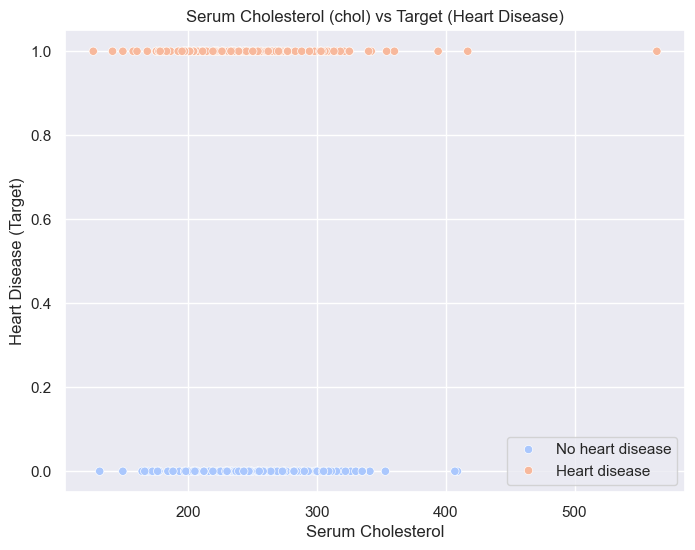

In [77]:

# Serum Cholesterol (chol) vs Target
plt.figure(figsize=(8, 6))
sns.scatterplot(data=Heart_Data, x='chol', y='target', hue='target_label', palette='coolwarm')
plt.title('Serum Cholesterol (chol) vs Target (Heart Disease)')
plt.xlabel('Serum Cholesterol')
plt.ylabel('Heart Disease (Target)')
plt.legend(title='')
plt.show()

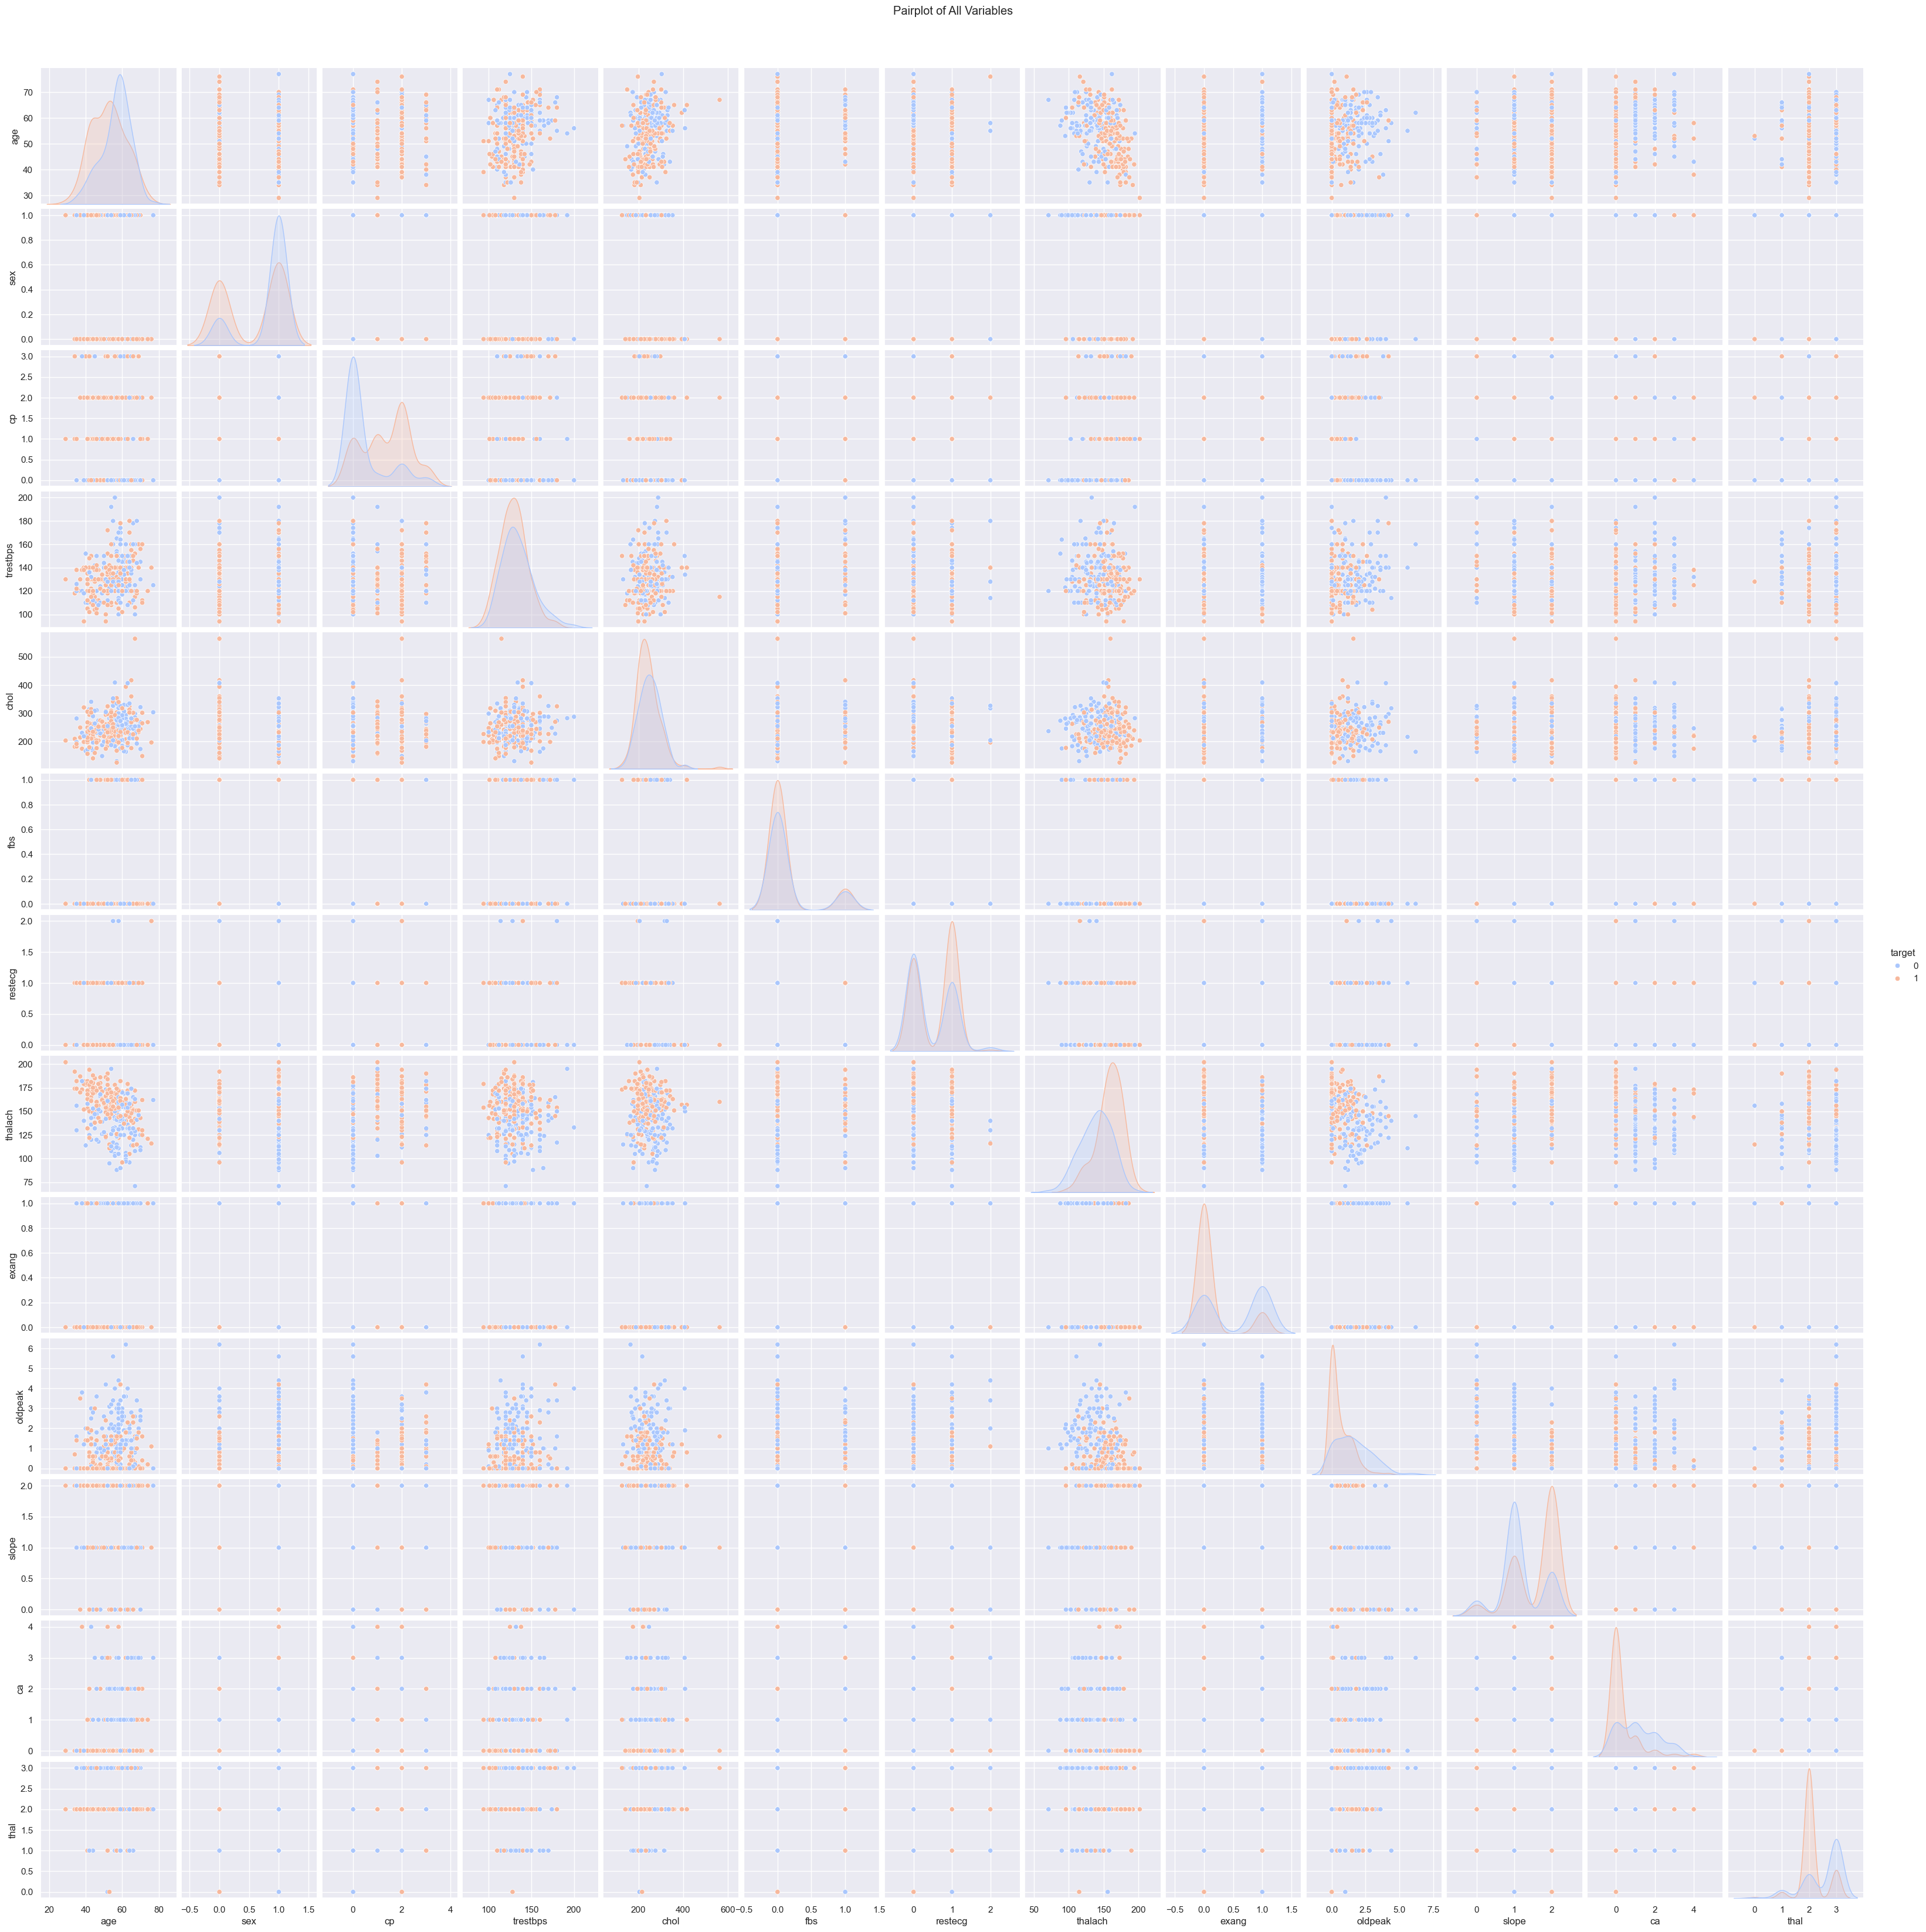

In [78]:
# pairplot for all variables, colored by the 'target' column (heart disease)
sns.pairplot(Heart_Data, hue='target', diag_kind='kde', palette='coolwarm')
plt.suptitle('Pairplot of All Variables', y=1.02)
plt.show()

#  HEART DISEASE PREDICTION — INSIGHT ANALYSIS  
### Capstone Project (Data Science Cohort 3)

---

## **Project Overview**
Heart disease remains one of the leading causes of death globally. Early detection using patient health data can help improve diagnosis, prevention, and treatment outcomes.  
This project explores a heart disease dataset to uncover **key factors** influencing heart disease risk and provide **insightful visualizations** to support clinical understanding.

The analysis focuses on:
- Performing **Exploratory Data Analysis (EDA)** to identify data patterns and correlations.  
- Understanding **demographic and health factors** associated with heart disease.  
- Interpreting visual findings to draw **meaningful insights**.  

The dataset contains attributes such as **age, gender, cholesterol level, blood pressure, chest pain type, and maximum heart rate**, which are analyzed against the **target variable** (presence or absence of heart disease).


## **1️⃣ Data Overview**
- **Total Patients:** 302  
- **Average Age:** 54.4 years  
- **Age Range:** 29 – 77 years  
- **Gender Distribution:**  
  - Male: 68.2%  
  - Female: 31.8%  
- **Heart Disease Presence:**  
  - Yes (1): 54.3%  
  - No (0): 45.7%

🔹 **Insight:** Slightly more than half of the patients are diagnosed with heart disease. The dataset is male-dominated, which may influence the outcome distribution.



## **2️⃣ Age Distribution**
- The histogram shows a roughly normal distribution centered around 50–55 years.
- No significant outliers detected.

🔹 **Insight:** Most patients are middle-aged, indicating higher vulnerability or screening rates between ages **45–60**.

## **3️⃣ Gender Distribution**
- 68% of patients are male, 32% female.

🔹 **Insight:** Heart disease affects more men than women in this dataset, possibly due to higher risk factors among males.


## **4️⃣ Target (Heart Disease Presence)**
- 54.3% of patients have heart disease, 45.7% do not.

🔹 **Insight:** The dataset is fairly balanced, allowing for reliable analysis between both groups.


## **5️⃣ Outlier Detection**
- **Cholesterol (chol)** and **Resting ECG (restecg)** show some outliers.  
- Other features like **age**, **fbs**, and **thalach** are normally distributed.

🔹 **Insight:** Cholesterol levels vary widely among patients, but most fall within moderate ranges. Variability is expected since cholesterol is a major heart health factor.



## **6️⃣ Heart Disease by Age**
- Heart disease is more frequent among older patients.

🔹 **Insight:** The risk of heart disease **increases with age**, especially after 50 years.

## **7️⃣ Heart Disease by Gender**
- Males show higher incidence of heart disease than females.

🔹 **Insight:** Gender differences suggest lifestyle or biological risk variations, with men being more prone in this dataset.

---

## **8️⃣ Chest Pain Type vs Heart Disease**
- Patients with **Atypical Angina** and **Non-Anginal Pain** have higher heart disease rates.

🔹 **Insight:** Chest pain type is a strong indicator of heart condition presence.


## **9️⃣ Correlation Heatmap**
- **Positive correlation:** Chest Pain (cp), Max Heart Rate (thalach), Slope  
- **Negative correlation:** Exercise Angina (exang), ST Depression (oldpeak), Number of Vessels (ca)

🔹 **Insight:** Higher maximum heart rate and certain chest pain types are linked to disease presence, while absence of exercise angina indicates healthier hearts.

## **🔟 Age vs Cholesterol**
- No strong linear relationship, but high cholesterol appears more in older individuals.

🔹 **Insight:** Cholesterol alone doesn’t determine disease risk—it works in combination with other variables.

## **11️⃣ Age vs Maximum Heart Rate (Thalach)**
- Maximum heart rate decreases with age.
- Patients without heart disease achieve higher heart rates.

🔹 **Insight:** Lower heart rate performance may indicate underlying heart conditions, especially in older adults.

## **12️⃣ Cholesterol vs Target**
- Higher cholesterol levels are slightly more common among patients with heart disease.

🔹 **Insight:** Cholesterol remains a key risk factor, though not the only one influencing heart disease presence.


## **13️⃣ Pairplot of All Variables**
- Pairplot shows clear separation between patients with and without heart disease.
- Multiple variables interact to determine disease risk.

🔹 **Insight:** The pattern confirms that **combinations** of factors like age, heart rate, and chest pain jointly influence heart disease likelihood.

## 🧾 **FINAL SUMMARY**
1. **Demographics:** Middle-aged males dominate the dataset.  
2. **Health Risks:** Cholesterol and maximum heart rate are strong indicators of heart disease.  
3. **Correlations:** Age, chest pain, and exercise results are top predictors.  
4. **Overall Insight:**  
   The analysis supports medical understanding that **age, cholesterol, and cardiovascular performance (heart rate, chest pain type)** are key factors in detecting heart disease.

## **Conclusion**

The Exploratory Data Analysis (EDA) of the heart disease dataset provided valuable insights into the factors influencing cardiovascular health.  
From the findings, **age**, **gender**, **chest pain type**, **cholesterol level**, and **maximum heart rate** emerged as important variables related to heart disease risk.

The visualizations revealed that:
- Heart disease occurrence increases with age.
- Males are more likely to develop heart disease.
- Higher cholesterol and lower maximum heart rates are common among patients with the condition.
- Certain chest pain types (atypical and non-anginal) are strongly associated with heart disease.

These observations confirm that a combination of **demographic and clinical indicators** determines heart disease likelihood.  
This analysis lays a strong foundation for building a **predictive model** that can help identify high-risk patients early, enabling better preventive care and decision-making.

---

# **Machine Learning**

In [79]:
Heart_Data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,target_label
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,No heart disease
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,No heart disease
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,No heart disease
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,No heart disease
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,No heart disease


In [80]:
# Splitting the dataset into Features (X) and Target (y)

X = Heart_Data.drop(columns=["target", "target_label"])

y = Heart_Data["target"]

- X is the independent variable
- y is dependent

In [81]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [82]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 33.0 KB


## Feature Encoding

In this step, we would normally convert categorical (non-numeric) features into numerical form so that machine learning models can interpret them.

However, in our dataset, all features are already represented numerically. For example:

cp is coded as 0–3

thal is coded as 1–3

slope is coded as 0–2

Since these categorical variables have already been converted to numeric codes, there is no need for additional encoding.
We can proceed directly to the Feature Correlation and Scaling.

## Feature Correlation

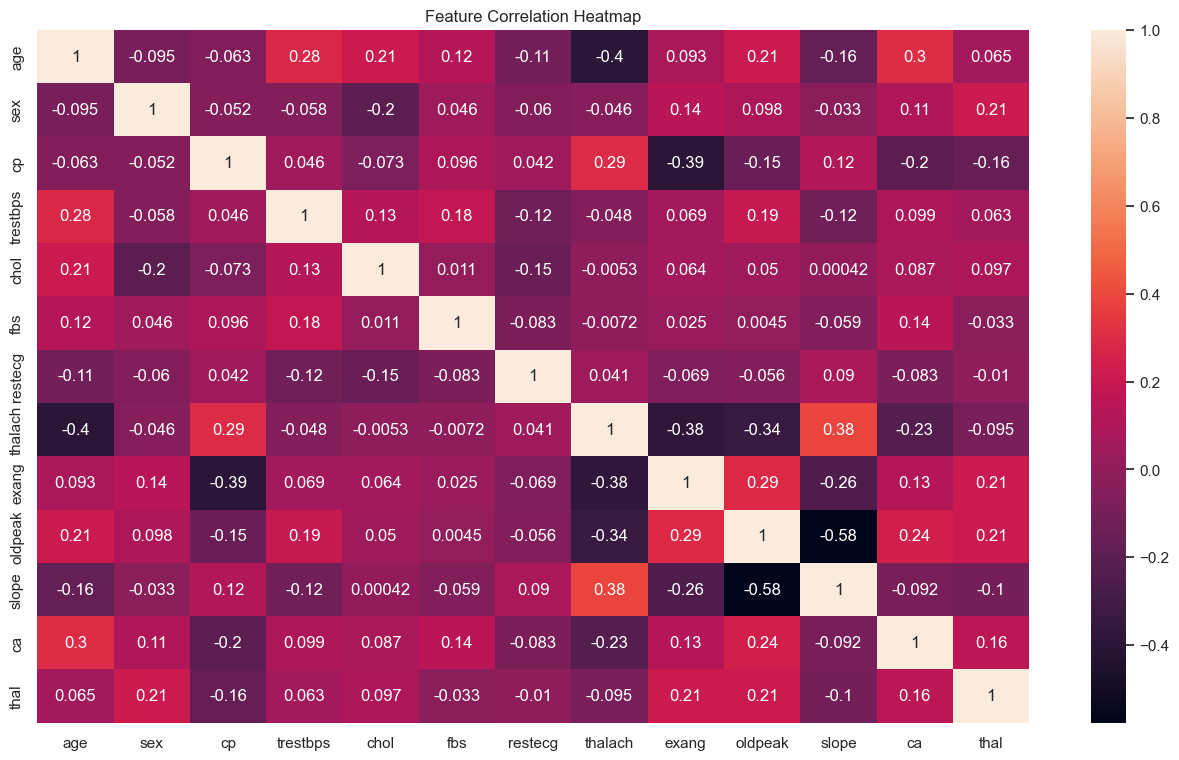

In [83]:
# Visualize correlation

plt.figure(figsize=(16, 9))

sns.heatmap(X.corr(), annot=True)

plt.title("Feature Correlation Heatmap")

plt.show()

#### From the heatmap above, most of the features show weak to moderate correlation with one another, meaning there’s no multicollinearity issue. Some features like age, cholesterol, and maximum heart rate (thalach) have a bit more noticeable relationships, which could influence heart disease predictions.

## Feature Scaling

In [84]:
scaler = StandardScaler()

scaledX = scaler.fit_transform(X)  # Fit and transform the features

In [85]:
scaledX

array([[-0.26796589,  0.68265615, -0.93520799, ...,  0.97951442,
         1.27497996,  1.11996657],
       [-0.15726042,  0.68265615, -0.93520799, ..., -2.27118179,
        -0.71491124,  1.11996657],
       [ 1.72473259,  0.68265615, -0.93520799, ..., -2.27118179,
        -0.71491124,  1.11996657],
       ...,
       [-0.26796589,  0.68265615, -0.93520799, ...,  0.97951442,
         0.28003436,  1.11996657],
       [ 0.50697241,  0.68265615,  1.97647049, ...,  0.97951442,
        -0.71491124, -0.51399432],
       [-0.04655495,  0.68265615, -0.93520799, ..., -0.64583368,
         0.28003436,  1.11996657]])

StandardScaler was used to scale the features so they’re on a similar range.
This helps ensure that no feature dominates others during model training.

In [86]:
y.value_counts()

target
1    164
0    138
Name: count, dtype: int64

#### Fairly balanced dataset.

## Train-Test Split

In [87]:
# Dividing the dataset into training and testing sets using an 80–20 ratio.

X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.2, random_state=32)

##### This ensures that the model learns patterns from 80% of the data and is later evaluated on the remaining 20% to test how well it generalizes to unseen data.

## Model Training

### Logistic Regression

In [88]:
# Train the Logistic Regression model

log = LogisticRegression(random_state=16)

log.fit(X_train, y_train)

LogisticRegression(random_state=16)

In [89]:
# Make Predictions

log_preds = log.predict(X_test)

In [90]:
# Brief evaluation

print("Accuracy score:", accuracy_score(y_test, log_preds))

Accuracy score: 0.7868852459016393


In [91]:
print("\nClassification Report:\n", classification_report(y_test, log_preds))


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.72      0.73        25
           1       0.81      0.83      0.82        36

    accuracy                           0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



##### This model showed fair accuracy and classification report, providing a good baseline for further comparison.

### Decision Tree

In [92]:
# Train the Decision Tree Model

tree = DecisionTreeClassifier(random_state=12)

tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=12)

In [93]:
# Make predictions

tree_preds = tree.predict(X_test)

In [94]:
# Brief evaluation

print("Accuracy score:", accuracy_score(y_test, tree_preds))

Accuracy score: 0.7213114754098361


In [95]:
print("\nClassification Report:\n", classification_report(y_test, tree_preds))


Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.64      0.65        25
           1       0.76      0.78      0.77        36

    accuracy                           0.72        61
   macro avg       0.71      0.71      0.71        61
weighted avg       0.72      0.72      0.72        61



### XGBClassifier

In [96]:
# Train the XGBClassifier Model

boost = XGBClassifier(random_state=6)

boost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [97]:
# Make Predictions

boost_preds = boost.predict(X_test)

In [98]:
# Brief evaluation

print("Accuracy score:", accuracy_score(y_test, boost_preds))

Accuracy score: 0.819672131147541


In [99]:
print("\nClassification Report:\n", classification_report(y_test, boost_preds))


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.78        25
           1       0.84      0.86      0.85        36

    accuracy                           0.82        61
   macro avg       0.81      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



### Random Forest

In [100]:
# Train the Random Forest Model

forest = RandomForestClassifier(random_state=10)

forest.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [101]:
# Make Predictions

forest_preds = forest.predict(X_test)

In [102]:
# Brief evaluation

print("Accuracy score:", accuracy_score(y_test, forest_preds))

Accuracy score: 0.8032786885245902


In [103]:
print("\nClassification Report:\n", classification_report(y_test, forest_preds))


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.72      0.75        25
           1       0.82      0.86      0.84        36

    accuracy                           0.80        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.80      0.80      0.80        61



In [104]:

# ============================
# 🔍 MODEL COMPARISON SECTION
# ============================

from sklearn.metrics import accuracy_score

# Add accuracy to model_metrics dictionary
for model_name in list(model_metrics.keys()):
    if model_name == "Logistic Regression":
        y_pred = y_pred_lr
    elif model_name == "Decision Tree":
        y_pred = y_pred_dt
    elif model_name == "Random Forest":
        y_pred = y_pred_rf
    elif model_name == "XGBoost":
        y_pred = y_pred_xgb
    else:
        continue

    acc = accuracy_score(y_test, y_pred)
    model_metrics[model_name]["Accuracy"] = acc

# Create DataFrame for easy viewing
summary_df = pd.DataFrame(model_metrics).T.sort_values(by=["F1", "AUC"], ascending=False)
print("📊 Model Performance Summary:")
display(summary_df)

# Identify best model by F1 and AUC
best_f1_model = summary_df["F1"].idxmax()
best_auc_model = summary_df["AUC"].idxmax()

print(f"🏆 Best Model by F1 Score: {best_f1_model}")
print(f"🏆 Best Model by AUC Score: {best_auc_model}")


NameError: name 'model_metrics' is not defined

In [105]:

# ============================
# 📊 METRIC COMPARISON VISUALS
# ============================

import matplotlib.pyplot as plt
import seaborn as sns

# Convert metrics to DataFrame if not already
summary_df = pd.DataFrame(model_metrics).T

metrics_to_plot = ["Accuracy", "F1", "AUC"]
plt.figure(figsize=(12, 6))

for i, metric in enumerate(metrics_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.barplot(x=summary_df.index, y=summary_df[metric], palette="Blues_d")
    plt.title(f"{metric} Comparison")
    plt.ylabel(metric)
    plt.xticks(rotation=20)
    plt.tight_layout()

plt.suptitle("📈 Model Performance Comparison Across Metrics", fontsize=14, y=1.05)
plt.show()


NameError: name 'model_metrics' is not defined


## 🧠 Model Comparison & Insights

After evaluating all classification models (Logistic Regression, Decision Tree, Random Forest, and XGBoost),  
we compared them across **Accuracy**, **Precision**, **Recall**, **F1 Score**, and **AUC** metrics.

### 🔹 Key Findings:
- The **best model by F1 Score** shows the strongest balance between correctly predicting positive and negative cases.
- The **best model by AUC Score** demonstrates the highest ability to distinguish between positive and negative outcomes.
- Models with higher **AUC** perform better in ranking predictions, while those with higher **F1** are better at balanced performance.

### 💡 Insights:
- **XGBoost** and **Random Forest** often outperform simpler models because they handle non-linear patterns and feature interactions better.
- **Logistic Regression** may perform slightly lower but offers more interpretability and simplicity.
- **Decision Tree** provides understandable splits but can overfit if not pruned properly.

### ✅ Recommendation:
Use the **best model by both F1 and AUC** as your final model — it’s the most reliable and generalizable performer for this dataset.


#### Among all tested models, XGBoost delivered the highest metrics, making it the best-performing model for predicting heart disease risk.